<a href="https://colab.research.google.com/github/luckguy/SS2022/blob/main/SS07_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Characterization of Discrete Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Linear Convolution

It was previously shown, that the convolution is an important operation in the theory of signals and linear time-invariant (LTI) systems.
The *linear convolution* of two discrete signals $x[k]$ and $h[k]$ is defined as

\begin{equation}
x[k] * h[k] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[k - \kappa] = \sum_{\kappa = -\infty}^{\infty} x[k - \kappa] \cdot h[\kappa]
\end{equation}

where $*$ is the most common short-hand notation of the convolution.
For multidimensional systems, sometimes a subscript is used to ensure clarity.
For example, here $*_k$ might be used to indicate the convolution with respect to $k$. Note, that the linear convolution needs to be clearly distinguished from the cyclic convolution introduced later.

In this notebook, the general properties of the linear convolution are discussed, followed by a geometrical interpretation of the operation.

### Properties

For the discrete signals $x[k]$, $h[k]$, $g[k] \in \mathbb{C}$ with $k\in\mathbb{Z}$ the linear convolution exhibits the following properties 

1. The Dirac impulse is the [identity element](https://en.wikipedia.org/wiki/Identity_element) of the convolution
    \begin{equation}
    x[k] * \delta[k] = x[k]
    \end{equation}
    
2. The convolution is [commutative](https://en.wikipedia.org/wiki/Commutative_property) (cf. the above definition)
    \begin{equation}
    x[k] * h[k] = h[k] * x[k]
    \end{equation}
    
3. The convolution is [associative](https://en.wikipedia.org/wiki/Associative_property)
    \begin{equation}
    \left( x[k] * h[k] \right) * g[k] = x[k] * \left( h[k] * g[k] \right) 
    \end{equation}

5. The convolution is [distributive](https://en.wikipedia.org/wiki/Distributive_property)
    \begin{equation}
    x[k] * \left( h[k] + g[k] \right) = x[k] * h[k] + x[k] * g[k]
    \end{equation}

5. Multiplication with a scalar $a \in \mathbb{C}$
    \begin{equation}
    a \cdot \left( x[k] * h[k] \right) = \left( a \cdot x[k] \right) * h[k] = x[k] * \left( a \cdot h[k] \right)
    \end{equation}

The first property is a consequence of the sifting property of the Dirac pulse, the second to fifth property can be proven by considering the definition of the convolution.

### Graphical Interpretation

The convolution is commonly [interpreted in a graphical manner](https://en.wikipedia.org/wiki/Convolution#Visual_explanation).
This interpretation provides valuable insights into its calculation and allows to estimate the result.
The calculation of the sum for linear convolution

\begin{equation}
y[k] = x[k] * h[k] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[k - \kappa]
\end{equation}


can be decomposed into four subsequent steps:

1. substitute $k$ by $\kappa$ in both $x[k]$ and $h[k]$,

2. time-reverse $h[\kappa]$ (reflection at vertical axis),

3. shift $h[- \kappa]$ by $k$ to yield $h[k - \kappa]$, i.e. a shift to **right** for $k>0$ or a shift to **left** for $k<0$,

4. check for which $k = -\infty \dots \infty$ the mirrored and shifted $h[k - \kappa]$ overlaps with $x[\kappa]$, calculate the specific sum for all the relevant $k$ to yield $y[k]$

This interpretation is illustrated in the following example using simple signals $x[k]$ and $h[k]$.

**Example**

Let us define the causal signals

\begin{align}
h[k] &= \epsilon[k] \cdot e^{- \frac{k}{2}} \\
x[k] &= \frac{4}{5} \text{rect}_N[k] 
\end{align}

using $N=6$.

The signal $h[k]$ can be interpreted as the impulse response of a simple lowpass filter (LTI system).
Thus, we expect that the edges of the rectangular burst as the input signal of the LTI system are smoother after the convolution (filtering).

Before proceeding, some helper functions and the signals need to be defined.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

def heaviside(k):
    return np.where(k >= 0, 1.0, 0.0)


def rect(k, N):
    return np.where((0 <= k) & (k < N), 1.0, 0.0)


def x(k):
    return 4/5 * rect(k, 6)


def h(k):
    return heaviside(k) * np.exp(- k/2)


def plot_signals(k, x, h, xlabel, hlabel, klabel):
    plt.figure(figsize=(8, 4))
    plt.stem(k, x, linefmt='C0-', markerfmt='C0o', label=xlabel)
    plt.stem(k, h, linefmt='C1-', markerfmt='C1o', label=hlabel)
    plt.xlabel(klabel)
    plt.legend()
    plt.ylim([0, 1.2])
    plt.grid(True)

The signals $x[k]$ and $h[k]$ are computed and plotted below for a specified range of $k$.

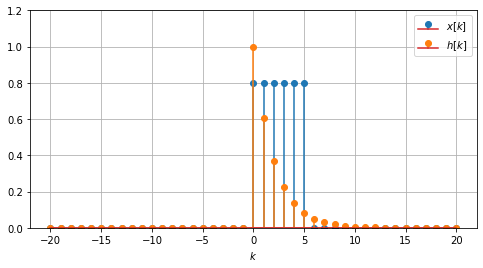

In [29]:
k = np.arange(-20, 21)

plot_signals(k, x(k), h(k), r'$x[k]$', r'$h[k]$', r'$k$')

The **first step** is to substitute $k$ by $\kappa$, in both $x[k]$ and $h[k]$, to yield $x[\kappa]$ and $h[\kappa]$.
Note, the horizontal axis of the plot now represents $\kappa$, which is our temporal helper variable for the summation. The plot is depicted below.

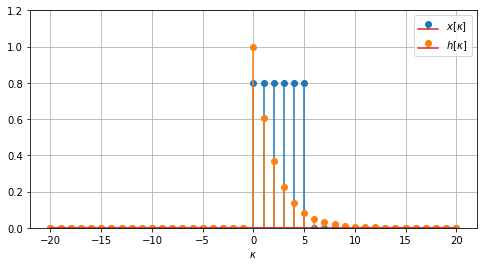

In [30]:
kappa = np.arange(-20, 21)

x1 = x(kappa)
h1 = h(kappa)

plot_signals(kappa, x1, h1, r'$x[\kappa]$', r'$h[\kappa]$', r'$\kappa$')

The **second step** is to time-reverse $h[\kappa]$ at the ordinate (i.e. for $\kappa=0$) axis to yield $h[-\kappa]$

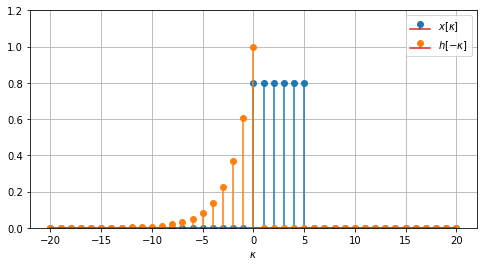

In [31]:
h2 = h(kappa[::-1])  # Python's elegant array reversal

plot_signals(k, x1, h2, r'$x[\kappa]$', r'$h[-\kappa]$', r'$\kappa$')

In the **third step** the impulse response $h[-\kappa]$ is shifted by $k$ samples to yield $h[k - \kappa]$.
The shift is performed to the **right** for $k>0$ and to the **left** for $k<0$.

For the **fourth step** it is often useful to split the calculation of the result according to the overlap between $h[k-\kappa]$ and $x[\kappa]$.
For the given example three different cases need to be considered

1. no overlap for $k<0$,
2. partial overlap for $0 \leq k < 6$, and
3. full overlap for $k \geq 6$ (note that the chosen impulse response $h[k]$ is infinite and decays asymptotically).

The first case, no overlap, is illustrated below for $k= - 5$ (shift to left).

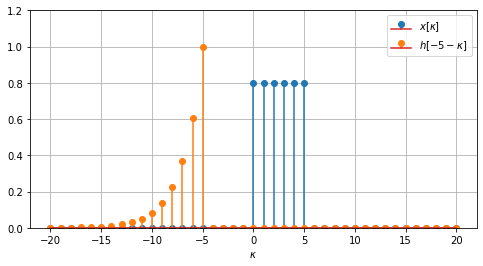

In [32]:
h3 = h(-5 + kappa[::-1])

plot_signals(k, x1, h3, r'$x[\kappa]$', r'$h[-5 -\kappa]$', r'$\kappa$')

From this it becomes clear that the convolution result for the first case is given as

\begin{equation}
y[k] = 0 \qquad \text{for } k < 0
\end{equation}

The second case, i.e. the partial overlap, is illustrated below for $k = 3$ (shift to the right). 

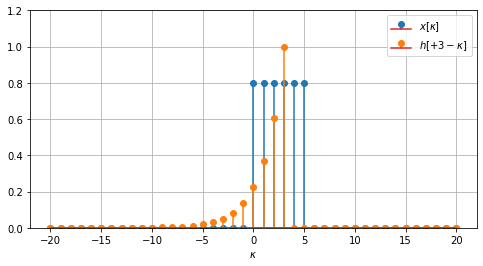

In [33]:
h4 = h(3 + kappa[::-1])

plot_signals(k, x1, h4, r'$x[\kappa]$', r'$h[+3 -\kappa]$', r'$\kappa$')

Hence, for the second case the convolution sum degenerates to

\begin{equation}
y[k] = \frac{4}{5} \sum_{\kappa=0}^{k} e^{-\frac{k - \kappa}{2}}  \qquad \text{for } 0 \leq k < 6
\end{equation}

The third case, full overlap, is illustrated below for $k = 10$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


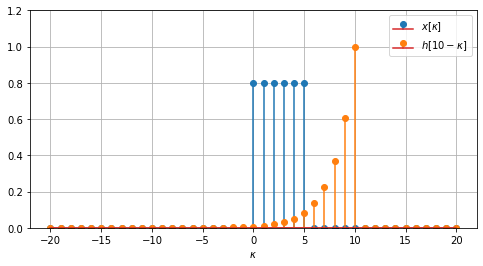

In [7]:
h5 = h(10 + kappa[::-1])

plot_signals(k, x1, h5, r'$x[\kappa]$', r'$h[10 -\kappa]$', r'$\kappa$')

For the third case the convolution sum degenerates to

\begin{equation}
y[k] = \frac{4}{5} \sum_{\kappa=0}^{5} e^{-\frac{k - \kappa}{2}}  \qquad \text{for } k \geq 6
\end{equation}

The overall result is composed from the three individual results. As alternative and in order to plot the result, the convolution is evaluated numerically with numpy's `convolve`.
Note that `convolve` performs plain convolution and does not care about any alignment regarding $k$, we've made up.
So, you might need to adapt the returned result to proper alignment with respect to $k$ if both signals did not start exact at $k=0$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


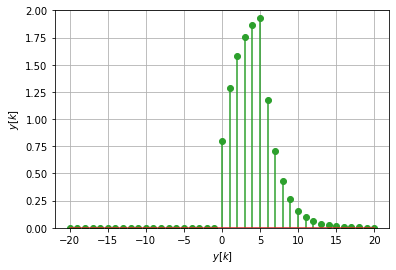

In [8]:
def y(k):
    return np.convolve(x(k), h(k), mode='same')


plt.stem(k, y(k), linefmt='C2-', markerfmt='C2o')
plt.xlabel(r'$y[k]$')
plt.ylabel(r'$y[k]$')
plt.ylim([0, 2])
plt.grid(True)

The entire process is illustrated in the following animation. The upper plot shows the integrands $h[k-\kappa]$ and $x[\kappa]$ of the convolution sum, the lower plot the result $y[k] = x[k] * h[k]$ of the convolution. The red dot in the lower plot indicates the particular time instant $k$ for which the result of the convolution sum is computed. The time instant $k$ is varied in the animation.

In [35]:
"""Animations of common operations in signal processing."""
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def animate_discrete_convolution(x, h, y, k, kappa, interval=100):

    def update_stem(stem, x, y):
        stem.markerline.set_data(x, y)
        for idx, stem_line in enumerate(stem.stemlines):
            stem_line.set_data([x[idx], x[idx]], [0, y[idx]])

    def animate(kappa_i):
        update_stem(stem_x, k, x(k))
        update_stem(stem_h, k, h(kappa_i - k))
        dot.set_data(kappa_i, y[-k[0] + kappa_i])

    # setup plot and define objects
    default_figsize = plt.rcParams.get('figure.figsize')
    fig, ax = plt.subplots(2, 1, figsize=(default_figsize[0],
            1.5*default_figsize[1]))
    fig.subplots_adjust(hspace=0.2)
    plt.close()  # suppresses empty plot in notebook

    stem_x = ax[0].stem(k, x(k), linefmt='C0-', markerfmt='C0o',
            basefmt=' ', label=r'$x[k]$')
    stem_h = ax[0].stem(k, h(kappa[0]-k), linefmt='C1-',
            markerfmt='C1o', basefmt=' ', label=r'$h(n - k)$')
    ax[0].set_xlabel(r'$k$')
    ax[0].legend(loc='upper right')
    ax[0].grid()

    y = y(k)
    ax[1].stem(k, y, linefmt='C2-', markerfmt='C2o', basefmt=' ',
               label=r'$y[n]$')
    dot, = ax[1].plot([], 'ro')
    ax[1].set_xlabel(r'$n$')
    ax[1].legend(loc='upper right')
    ax[1].grid()

    return FuncAnimation(fig, animate, kappa, interval=interval)


In [36]:
plt.rcParams['animation.html'] = 'jshtml'

kappa = np.arange(-10, 20)
anim = animate_discrete_convolution(x, h, y, k, kappa)
anim

### Linear Convolution of Finite-Length Signals

The length of a discrete signal $x[k]$ may be defined as the total number of samples in between the first sample which is not zero and the last sample which is zero, plus one.
Note that this might include zeros in between these boundaries.

A signal of finite-length (also called finite-length signal) is a signal whose length is finite.
By this definition, the Dirac impulse $\delta[k]$ becomes a finite-length signal of length one.

The convolution of two finite-length signals is of practical importance since the convolution can only be evaluated numerically (by a computer) for finite-length signals.

Any infinite-length signal can be truncated to a finite length sequence of interest by multiplying it with a properly shifted rectangular signal $\text{rect}_N[k - \kappa]$.
It is hence sufficient to consider the convolution of two causal rectangular signals of length $N, M \in \mathbb{N}$

\begin{equation}
y[k] = \text{rect}_N[k] * \text{rect}_M[k]
\end{equation}

in order to derive insights on the convolution of two arbitrary finite-length signals.
By following the above graphical interpretation of the linear convolution, the result for $N \leq M$ can be found as

\begin{equation}
y[k] = \begin{cases}
0 & \text{for }  k < 0 \\
k+1 & \text{for } 0 \leq k < N \\
N & \text{for } N \leq k < M \\
N+M-1-k & \text{for } M \leq k < N+M-1\\
0 & \text{for } k \geq N+M-1.
\end{cases}
\end{equation}

The convolution of two rectangular signals thus results in a finite-length signal.
The length of this signal is $N+M-1$.
This insight can be generalized to the convolution of two arbitrary finite-length signals by following above reasoning:
The convolution of two finite-length signals with length $N$ and $M$, respectively results in a finite-length signal of length $N+M-1$.

For two causal signals $x[k]$ and $h[k]$ of finite length $N$ and $M$ the convolution reads

\begin{equation}
x[k] * h[k] = \sum_{\kappa = 0}^{N-1} x[\kappa] \cdot h[k - \kappa] = \sum_{\kappa = 0}^{M-1} x[k - \kappa] \cdot h[\kappa]
\end{equation}

for $0 \leq k < N+M-1$. The computation of each output sample requires at least $N$ multiplications and $N-1$ additions. The numerical complexity of the convolution for the computation of $N$ output samples is therefore [in the order of](https://en.wikipedia.org/wiki/Big_O_notation) $\mathcal{O} ( N^2 )$.

**Example**

The convolution of two rectangular signals $y[k] = \text{rect}_N[k] * \text{rect}_M[k]$ of length $N$ and $M$ is computed in the following. The resulting signal is plotted for illustration.

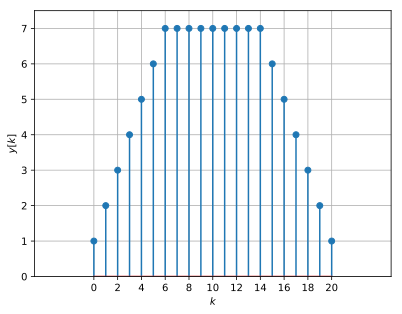

In [ ]:
N = 7
M = 15

y = np.convolve(np.ones(N), np.ones(M), mode='full')

plt.stem(y)
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.ylim([0, N+.5])
plt.xlim([-5, 25])
plt.xticks(np.arange(0,21,2));
plt.grid(True)

**Exercise**

* Compute the convolution of two rectangular signals of equal length analytically. Check your results by modifying the numerical example.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.